<a href="https://colab.research.google.com/github/manluz555-ops/Line_progr/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Programming
**Домашня робота №2**

Манзар Л.В

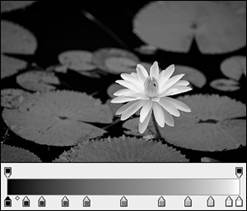

Saving flower.jpg to flower (3).jpg


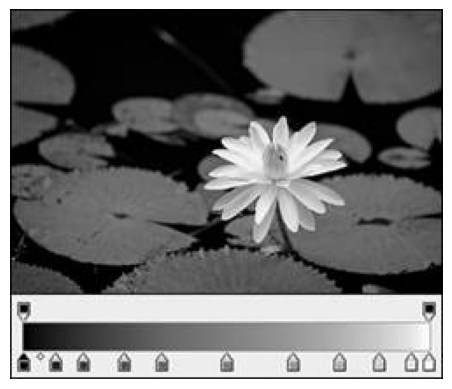

Розмір: (211, 247)


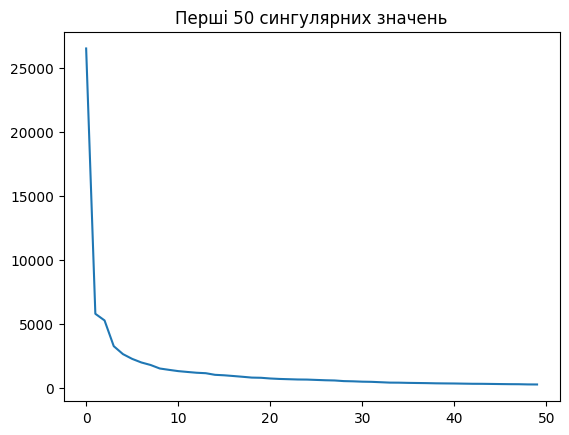

Помилка реконструкції: 1.3428321124455793


TypeError: 'AxesImage' object is not callable

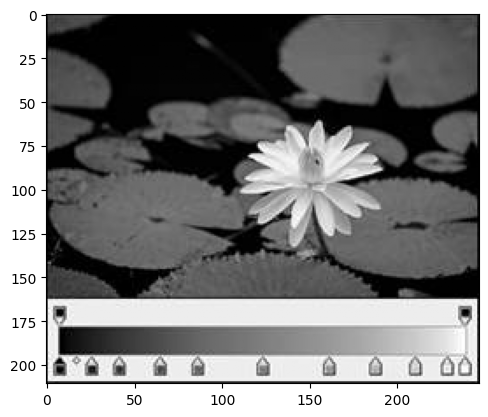

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import TruncatedSVD
from google.colab import files
uploaded = files.upload()
import matplotlib.image as mpimg
image = mpimg.imread("flower.jpg")

# 1. Завантажуємо зображення
image = mpimg.imread("flower.jpg")
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()


# 2. Дізнаємося розмір
print("Розмір:", image.shape)
if len(image.shape) == 3:
    height, width, channels = image.shape
else:
    height, width = image.shape
    channels = 1  # бо це чорно-біле зображення


# 3. Перетворюємо у 2D
flat_image = image.reshape(-1, width * channels)

# 4. Застосовуємо SVD
U, S, Vt = np.linalg.svd(flat_image, full_matrices=False)

# 5. Візуалізуємо перші k значень
k = 50
plt.plot(np.arange(k), S[:k])
plt.title("Перші 50 сингулярних значень")
plt.show()

# 6. Усічений SVD для стиснення
svd = TruncatedSVD(n_components=100)
truncated_image = svd.fit_transform(flat_image)

# 7. Реконструкція
reconstructed_image = svd.inverse_transform(truncated_image)

# 8. Помилка реконструкції
reconstruction_error = np.mean((reconstructed_image - flat_image)**2)
print("Помилка реконструкції:", reconstruction_error)

# 9. Повертаємо у 3D та показуємо
reconstructed_image = reconstructed_image.reshape(height, width, channels)
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype("uint8")

plt.imshow(image, cmap="gray")(reconstructed_image)
plt.axis("off")
plt.title("Реконструйоване зображення")
plt.show()
